In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Text Data: Analyst reports on BNP Paribas

In [2]:
df = pd.read_csv(r'../data/analysts/Text_data_Clean.csv', low_memory=False,index_col=0)
display(df.head())
print (df.shape)

,aac,abil,abl,absenc,absolut,ac,acceler,access,accord,accordingli,...,yen,yet,yield,yr,ytd,yy,zar,zee,zero,zhenro
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,7,0,0,0,0
2,0,1,3,0,0,0,0,0,13,0,...,0,1,5,0,0,11,0,0,0,0
3,0,1,3,1,0,0,0,0,17,0,...,0,1,4,0,0,8,0,0,0,0
4,0,0,0,0,0,0,2,0,1,0,...,0,0,1,0,0,13,0,0,0,0


(6453, 2000)


# PCA: Coding exercise
get the first 2 principal components of the text data

useful linear algebra functions: 
- matrix transpose is X.T, matrix multiplication np.dot(X,Y)
- e,V = np.linalg.eig(X) gives you eigenvalues e and eigenvector matrix V of the matrix X

In [3]:
# write your code here!

In [4]:
# %load pca_solution.py
# standardise data
X = (df - df.mean())/df.std()

# covariance matrix
C = np.dot(X.T,X) / (df.shape[0]-1)

# get eigenvalues and eigenvectors
e,V = np.linalg.eig(C)

# convert this to first two PC
Z = np.dot(X,V[:,0:2])

Z

array([[-5.87395004, -2.30976826],
       [-4.092879  , -2.09493335],
       [42.0123728 , -5.29202641],
       ...,
       [ 0.535443  , -2.24832782],
       [-0.34394483, -3.48627297],
       [-7.13309085,  1.41887851]])

In [5]:
# for speed: use preloaded package
pca = PCA(n_components=25)
X = (df - df.mean())/df.std()
Z = pca.fit_transform(X)
Z[:,0:2]

array([[-5.87395004, -2.30976838],
       [-4.092879  , -2.09493436],
       [42.0123728 , -5.29202397],
       ...,
       [ 0.535443  , -2.24832495],
       [-0.34394483, -3.48627002],
       [-7.13309085,  1.41887954]])

In [6]:
# get loadings on 5 most common terms
loadings = pd.DataFrame(pca.components_[0:2],index=['PC1','PC2'],columns = df.columns)
terms = list(df.sum(axis=0).sort_values(ascending=False)[0:10].index)
loadings = loadings[terms] 
loadings

,net,profit,oper,recur,growth,share,margin,price,ep,revenu
PC1,0.028002,0.033588,0.043209,0.012125,0.049543,0.045583,0.031639,0.040925,0.016209,0.030999
PC2,0.007008,0.006222,-0.036376,-0.038281,0.037188,-0.009312,-0.053885,-0.023300,-0.018319,-0.049901


Text(0,0.5,'Second principal component')

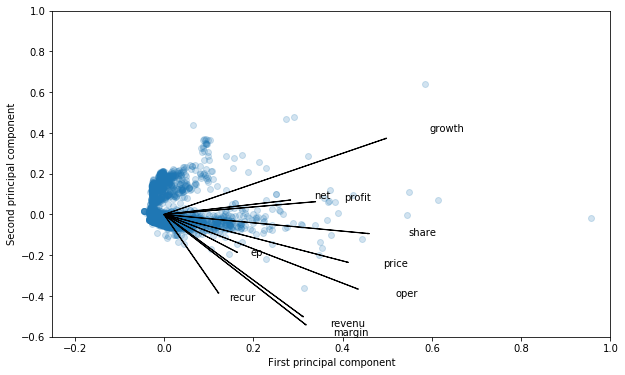

In [7]:
# biplot
plt.figure(figsize=(10,6))
for term in terms:
    plt.arrow(0,0,10*loadings.loc['PC1',term],10*loadings.loc['PC2',term])
    plt.text(12*loadings.loc['PC1',term],11*loadings.loc['PC2',term],term)
plt.scatter(Z[:,0]/(Z[:,0].max() - Z[:,0].min()) ,Z[:,1]/(Z[:,1].max() - Z[:,1].min()),alpha = 0.2)
plt.xlim(-0.25,1)
plt.ylim(-0.6,1)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

Text(0,0.5,'Percentage of Variance Explained')

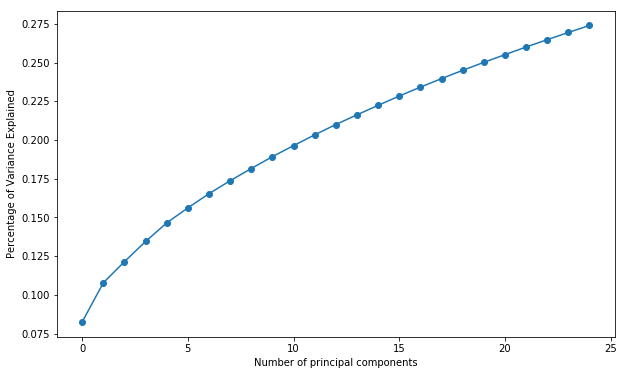

In [8]:
# scree plot
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'-o')
plt.xlabel('Number of principal components')
plt.ylabel('Percentage of Variance Explained')

# Stock Market Data

In [9]:
df = pd.read_csv(r'../data/crsp/CRSP_Clean.csv', low_memory=False,index_col=0)
df.head()

,20010131,20010228,20010330,20010430,20010531,20010629,20010731,20010831,20010928,20011031,...,20180329,20180430,20180531,20180629,20180731,20180831,20180928,20181031,20181130,20181231
"PERMNO, HSICCD",,,,,,,,,,,,,,,,,,,,,
"(10026, '2052')",-0.089219,0.053061,0.042636,0.225279,0.136408,-0.053823,0.060045,-0.039608,-0.168514,0.180800,...,0.019951,0.006224,0.030638,0.079791,-0.049256,0.003725,0.040137,0.034926,0.004547,-0.075094
"(10032, '3670')",0.544473,-0.342210,-0.170040,0.198829,-0.017253,0.093077,0.085152,-0.027646,-0.322803,0.060221,...,-0.009781,-0.081868,0.060357,0.023904,-0.002015,0.065130,-0.075525,-0.001880,0.045205,-0.163172
"(10044, '2060')",0.454545,-0.012500,0.303797,0.025243,0.098485,0.282759,-0.098925,-0.021480,0.112195,0.207237,...,-0.004098,-0.036575,-0.037964,0.036771,-0.102273,0.004868,0.004902,-0.197551,0.005459,0.045423
"(10065, '6726')",0.041429,-0.116141,-0.089870,0.097603,0.005720,-0.072170,-0.027420,-0.071346,-0.072229,-0.004698,...,-0.036530,0.007448,0.026210,0.013141,0.029183,0.044108,0.009080,-0.079784,0.041069,-0.106232
"(10104, '7372')",0.002151,-0.347639,-0.211579,0.078772,-0.053218,0.241830,-0.048421,-0.324668,0.030303,0.077901,...,-0.097099,0.002404,0.022991,-0.056935,0.086473,0.018876,0.061342,-0.049069,-0.001638,-0.074036


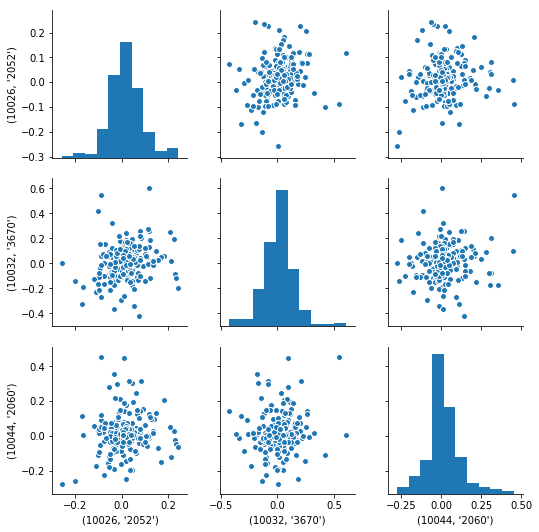

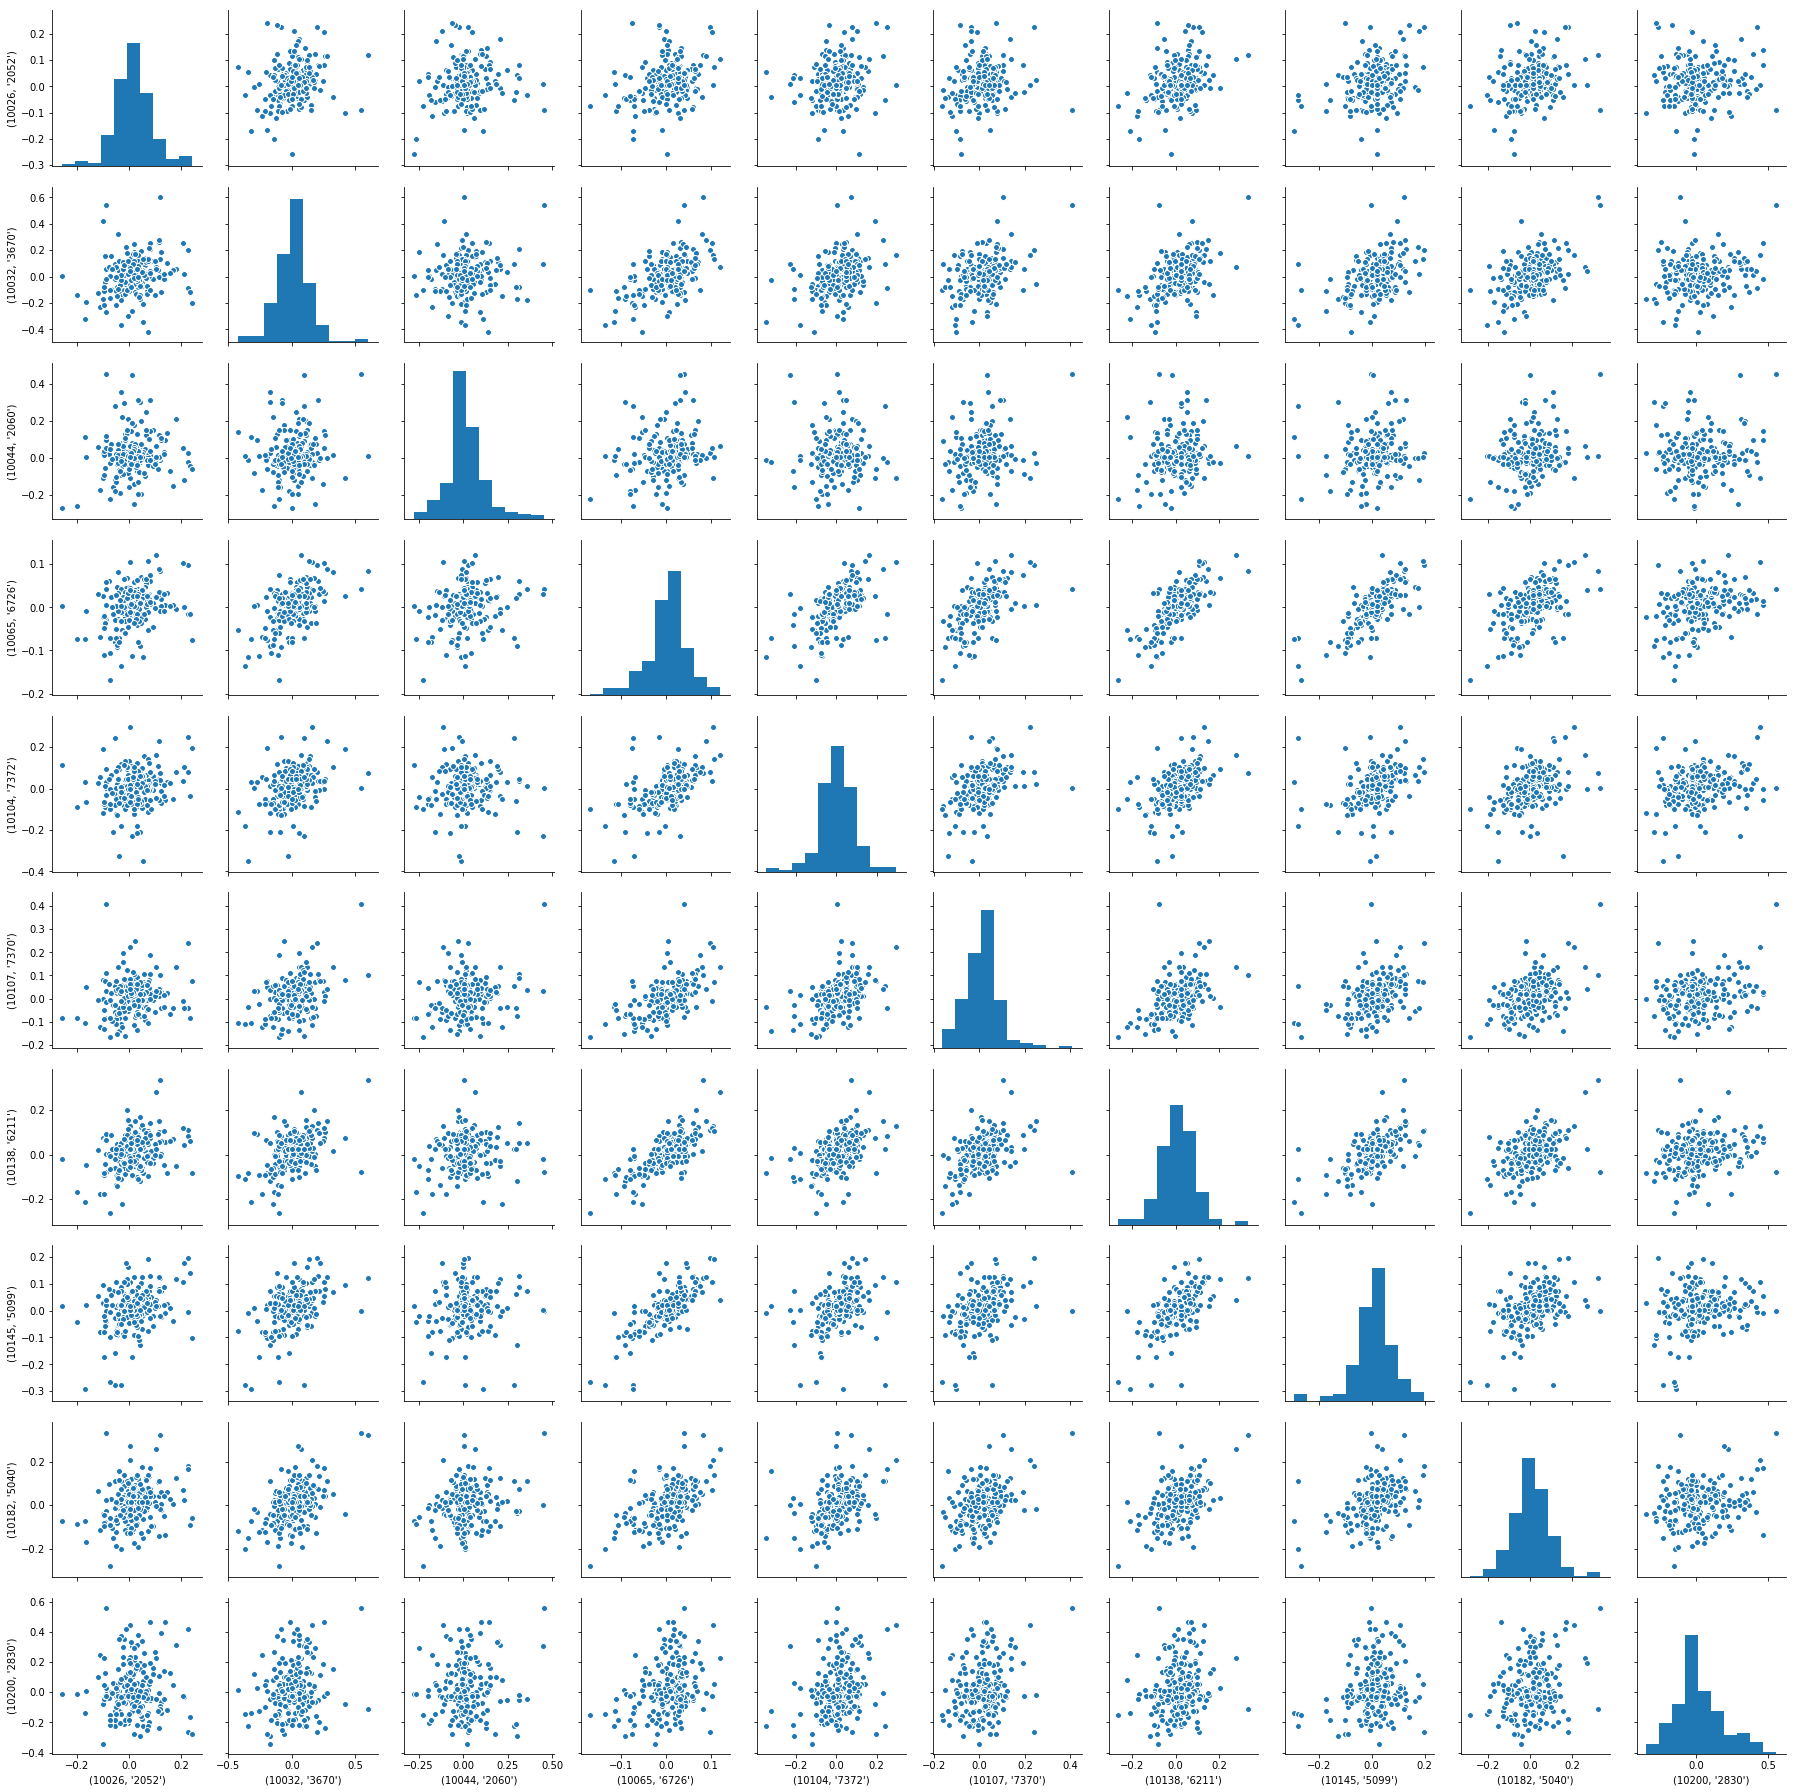

In [10]:
sns.pairplot(df.iloc[0:3].transpose())
plt.savefig('three_stocks.pdf')

sns.pairplot(df.iloc[0:10].transpose())
plt.savefig('ten_stocks.pdf')

In [11]:
# industry codes (for later)
sic = np.array([int(x.split(',')[1].strip()[1:2]) for x in list(df.index)])

In [12]:
sic

array([2, 3, 2, ..., 6, 6, 6])

# K-Means: Coding Exercise

Cluster the stocks (rows) of the data according to the distribution of their past returns (columns) using K-means

Useful: to initialise means at k random datapoints of the data frame X, run

means = X.sample(k,random_state = 123).values

In [13]:
# auxiliary functions
def get_means(labels,X,k):
    means = np.zeros((k,X.shape[1]))
    for c in range(k):
        points = X[labels == c]
        means[c,:] = points.mean(axis=0)
    return means
        

# auxiliary function for assigning closest centroids
def get_closest(means,X,k):
    distances = np.zeros((X.shape[0],k))
    for c in range(k):
        diff = X.values - means[c,:]
        distances[:,c] = np.linalg.norm(diff,axis=1)**2
        
    labels = np.argmin(distances,axis=1)
    min_distance = np.min(distances,axis=1)
    
    return labels, min_distance

In [14]:
# write your code here!

In [15]:
# %load kmeans_solution.py
k=3
X = (df - df.mean())/df.std()
means = X.sample(k,random_state = 123).values
labels, _ = get_closest(means,X,k)
for i in range(100):
    means = get_means(labels,X,k)
    new_labels, min_distance = get_closest(means,X,k)
    if (labels == new_labels).all(): 
        break
    else: 
        labels = new_labels

Text(0,0.5,'Second principal component of returns')

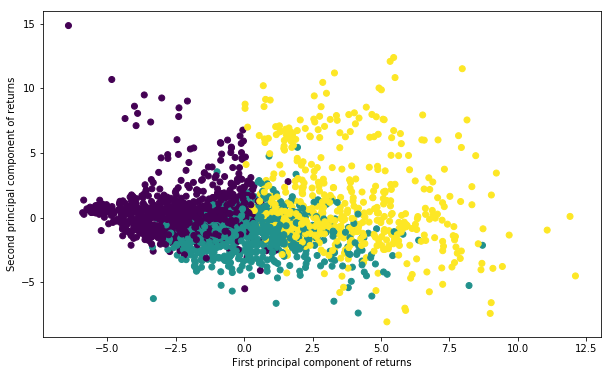

In [16]:
# visualisation
Z = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(10,6))
plt.scatter(Z[:,0],Z[:,1],c=labels)
plt.xlabel('First principal component of returns')
plt.ylabel('Second principal component of returns')

Text(0,0.5,'Within-cluster point scatter')

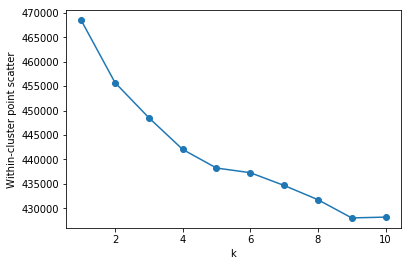

In [17]:
# for speed, use pre-loaded package
distances = []
for k in range(1,11): 
    fitted = KMeans(n_clusters=k,random_state = 234,n_init=10).fit(X)
    distances.append(fitted.inertia_)
plt.plot(range(1,11),distances,'-o')    
plt.xlabel('k')
plt.ylabel('Within-cluster point scatter')

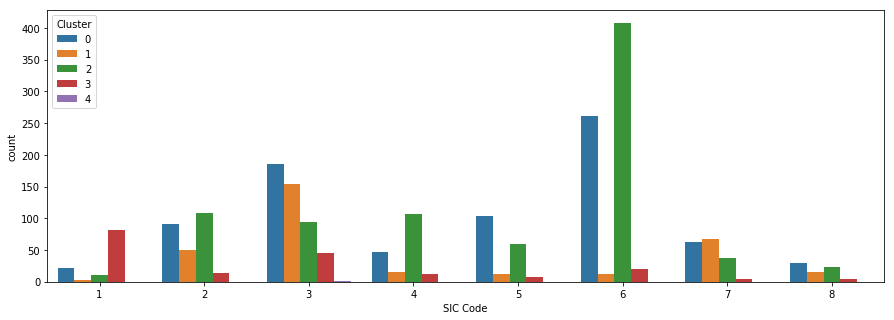

In [18]:
# what are we picking up?
labels = KMeans(n_clusters=5).fit_predict(X)
plt.figure(figsize=(15,5))
sns.countplot(sic,hue=labels)
plt.xlabel('SIC Code')
plt.legend(title='Cluster')